# 군집화 예제

In [1]:
%matplotlib inline
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# 중심점이 5개인 100개의 점 데이터 무작위 생성
points, labels = make_blobs(n_samples=100, centers=5, 
                            n_features=2, random_state=135)
print(points.shape, points[:10])
print(labels.shape, labels[:10]) # 중심점이 label 역할

(100, 2) [[ 4.63411914 -6.52590383]
 [-6.52008604  7.16624288]
 [ 2.14142339 -5.21092623]
 [ 1.70054231  8.54077897]
 [-0.33809159  8.76509668]
 [-7.69329744  7.94546313]
 [ 3.89090121 -3.06531839]
 [ 3.22338498 -2.93209009]
 [-6.63962964  5.34777334]
 [ 6.37904965 -6.46617328]]
(100,) [2 1 0 3 3 1 0 0 1 2]


,X,Y
0,4.634119,-6.525904
1,-6.520086,7.166243
2,2.141423,-5.210926
3,1.700542,8.540779
4,-0.338092,8.765097


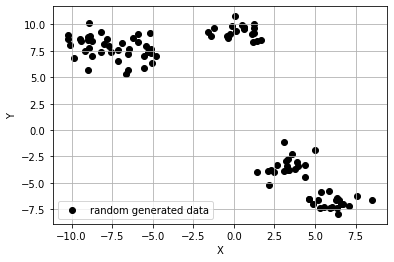

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

points_df = pd.DataFrame(points, columns=['X','Y'])
display(points_df.head())

ax.scatter(points[:,0], points[:,1], c='black', label='random generated data')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

# K-mean 알고리즘의 순서

1. 클러스터의 수(K) 결정
2. 무작위로 K개의 중심점 선정
3. 나머지 점들과 유클리드 거리를 계산 후 가까운 거리를 가지는 중심점 클러스터로 편입
4. K개 클러스터 중심점 재조정(클러스터에 속하는 점들의 평균값이 다음 iteration의 중심점
5. 조정된 중심점을 바탕으로 모든 점들과 유클리드 거리 계산 후 다시 클러스터로 편입
6. 4, 5번 반복 수행(특정 iteration이상이 되면 수렴)

[유클리드 거리에 대한 참조글](http://egloos.zum.com/metashower/v/9957577)

In [7]:
from sklearn.cluster import KMeans

kmeans_cluster = KMeans(n_clusters=5)
kmeans_cluster.fit(points)

print(type(kmeans_cluster.labels_))
print(np.shape(kmeans_cluster.labels_))
print(np.unique(kmeans_cluster.labels_))

<class 'numpy.ndarray'>
(100,)
[0 1 2 3 4]


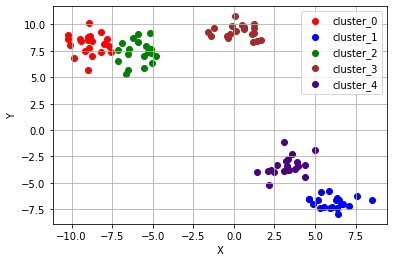

In [9]:
colors = ['red','blue','green','brown','indigo']
color_dict = {i:colors[i] for i in range(len(colors))}
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for cluster in range(5):
    cluster_sub_points = points[kmeans_cluster.labels_ == cluster] # label이 0인 점들 데이터 분리
    ax.scatter(cluster_sub_points[:,0], cluster_sub_points[:,1],
              c=color_dict[cluster],
              label='cluster_{}'.format(cluster))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

## K-means 알고리즘이 작동하지 않는 예시

### 예시 1

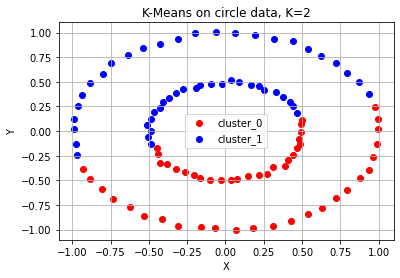

In [18]:
from sklearn.datasets import make_circles
# 원형 분포 점 데이터 100개 생성
circle_points, circle_labels = make_circles(n_samples=100,factor=0.5, noise=0.01)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

circle_kmeans = KMeans(n_clusters=2)
circle_kmeans.fit(circle_points, circle_labels)
color_dict = {0:'red',1:'blue'}
for cluster in range(2):
    cluster_sub_points = circle_points[circle_kmeans.labels_==cluster]
    ax.scatter(cluster_sub_points[:,0], cluster_sub_points[:,1],
              c=color_dict[cluster],label='cluster_{}'.format(cluster))
ax.set_title('K-Means on circle data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

### 예시2

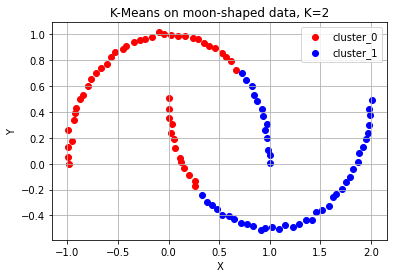

In [21]:
from sklearn.datasets import make_moons

moon_points, moon_labels = make_moons(n_samples=100, noise=0.01)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

moon_kmeans = KMeans(n_clusters=2)
moon_kmeans.fit(moon_points, moon_labels)

color_dict = {0:'red',1:'blue'}
for cluster in range(len(color_dict)):
    cluster_sub_points = moon_points[moon_kmeans.labels_==cluster]
    ax.scatter(cluster_sub_points[:,0],cluster_sub_points[:,1],c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-Means on moon-shaped data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

### 예시3

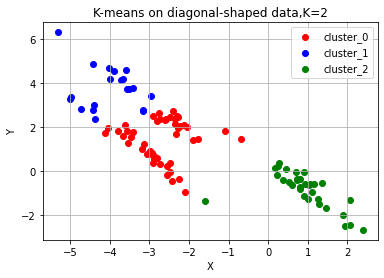

In [24]:
from sklearn.datasets import make_circles, make_moons, make_blobs
diag_points, _ = make_blobs(n_samples=100, random_state=170)
transformation = [[0.6,-0.6],[-0.4,0.8]]
diag_points = np.dot(diag_points, transformation)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

diag_kmeans = KMeans(n_clusters=3)
diag_kmeans.fit(diag_points)
color_dict = {0:'red',1:'blue',2:'green'}
for cluster in range(3):
    cluster_sub_points = diag_points[diag_kmeans.labels_==cluster]
    ax.scatter(cluster_sub_points[:,0], cluster_sub_points[:,1], c=color_dict[cluster],label='cluster_{}'.format(cluster))
ax.set_title('K-means on diagonal-shaped data,K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

## K값이 필요없는 군집 DBSCAN

[그림 참고 링크](http://primo.ai/index.php?title=Density-Based_Spatial_Clustering_of_Applications_with_Noise_(DBSCAN))

# of cluster:2
DBSCAN y-hat: [0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1
 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1
 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1]


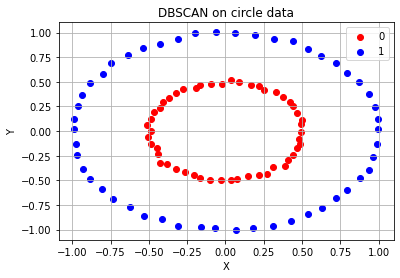

In [25]:
from sklearn.cluster import DBSCAN

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
color = ['red','blue','green','brown','purple']
color_dict = {i:color[i] for i in range(len(color))}

epsilon, minPts = 0.2, 3
circle_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
circle_dbscan.fit(circle_points)
n_cluster = max(circle_dbscan.labels_)+1

print(f'# of cluster:{n_cluster}')
print(f'DBSCAN y-hat: {circle_dbscan.labels_}')

for cluster in range(n_cluster):
    cluster_sub_points = circle_points[circle_dbscan.labels_==cluster]
    ax.scatter(cluster_sub_points[:,0], cluster_sub_points[:,1],c=color_dict[cluster],label=f'{cluster}')
ax.set_title('DBSCAN on circle data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

# of cluster: 2
DBSCAN Y-hat: [0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1
 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1
 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1]


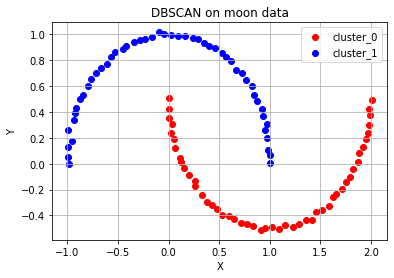

In [26]:
# 달 모양 분포 데이터 plot - 위와 같은 과정 반복
fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary

epsilon, minPts = 0.4, 3
moon_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
moon_dbscan.fit(moon_points)
n_cluster = max(moon_dbscan.labels_)+1

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {moon_dbscan.labels_}')

for cluster in range(n_cluster):
    cluster_sub_points = moon_points[moon_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on moon data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

# of cluster: 3
DBSCAN Y-hat: [ 0  1  1  0  0  2  2  0  1  2  2  2  0  2  0  1  2  2  2  1  1  1  1  1
  2  2  0  1  0  2  1  0  2  1  2  0  0  0  0  0  1  0  1  0  0  2  1  1
  0  2  1  1  2  1  0  2 -1  2  0  0  2  0  0  1  0  1  1  2  2  2 -1  0
  2  0  0  0  1  2  2 -1  2  2  1  2  0  0  2  1  1  2  1  1  2  0 -1  1
  0  0  0  1]


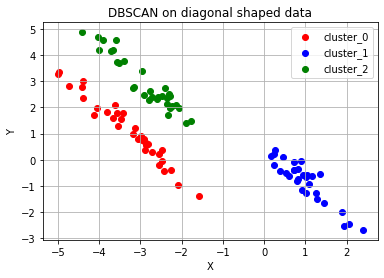

In [27]:
# 대각선 모양 분포 데이터 plot - 위와 같은 과정 반복
fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary

epsilon, minPts = 0.7, 3
diag_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
diag_dbscan.fit(diag_points)
n_cluster = max(diag_dbscan.labels_)+1

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {diag_dbscan.labels_}')

for cluster in range(n_cluster):
    cluster_sub_points = diag_points[diag_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on diagonal shaped data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

# of samples: 100 / Elapsed time of K-means: 0.48583s / DBSCAN: 0.00165s
# of samples: 500 / Elapsed time of K-means: 0.65872s / DBSCAN: 0.00329s
# of samples: 1000 / Elapsed time of K-means: 1.22107s / DBSCAN: 0.00851s
# of samples: 2000 / Elapsed time of K-means: 0.62575s / DBSCAN: 0.03907s
# of samples: 5000 / Elapsed time of K-means: 0.94745s / DBSCAN: 0.07846s
# of samples: 7500 / Elapsed time of K-means: 2.15524s / DBSCAN: 0.19562s
# of samples: 10000 / Elapsed time of K-means: 0.82285s / DBSCAN: 0.18656s
# of samples: 20000 / Elapsed time of K-means: 0.88586s / DBSCAN: 0.45408s
# of samples: 30000 / Elapsed time of K-means: 2.08477s / DBSCAN: 1.01110s
# of samples: 40000 / Elapsed time of K-means: 0.99872s / DBSCAN: 1.48223s
# of samples: 50000 / Elapsed time of K-means: 1.28099s / DBSCAN: 2.22198s


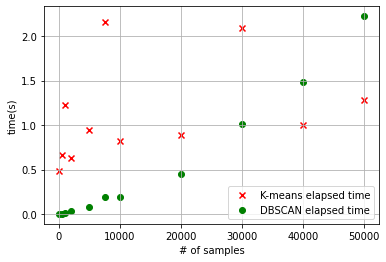

In [28]:
# DBSCAN 알고리즘과 K-means 알고리즘의 시간을 비교하는 코드 
import time

n_samples= [100, 500, 1000, 2000, 5000, 7500, 10000, 20000, 30000, 40000, 50000]

kmeans_time = []
dbscan_time = []
x = []
for n_sample in n_samples:
    dummy_circle, dummy_labels = make_circles(n_samples=n_sample, factor=0.5, noise=0.01) # 원형의 분포를 가지는 데이터 생성

    # K-means 시간을 측정
    kmeans_start = time.time()
    circle_kmeans = KMeans(n_clusters=2)
    circle_kmeans.fit(dummy_circle)
    kmeans_end = time.time()

    # DBSCAN 시간을 측정
    dbscan_start = time.time()
    epsilon, minPts = 0.2, 3
    circle_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
    circle_dbscan.fit(dummy_circle)
    dbscan_end = time.time()

    x.append(n_sample)
    kmeans_time.append(kmeans_end-kmeans_start)
    dbscan_time.append(dbscan_end-dbscan_start)
    print("# of samples: {} / Elapsed time of K-means: {:.5f}s / DBSCAN: {:.5f}s".format(n_sample, kmeans_end-kmeans_start, dbscan_end-dbscan_start))

# K-means와 DBSCAN의 소요 시간 그래프화
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, kmeans_time, c='red', marker='x', label='K-means elapsed time')
ax.scatter(x, dbscan_time, c='green', label='DBSCAN elapsed time')
ax.set_xlabel('# of samples')
ax.set_ylabel('time(s)')
ax.legend()
ax.grid()

## 차원축소(PCA) 예제

In [29]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# 0: 악성 종양, 1:양성 종양
cancer_X, cancer_y = cancer.data, cancer['target']
train_X, test_X, train_y, test_y = train_test_split(cancer_X, cancer_y,test_size=0.1, random_state=10)
print("전체 검사자 수: {}".format(len(cancer_X)))
print("Train dataset 사용되는 검사자 수: {}".format(len(train_X)))
print("Test dataset에 사용되는 검사자 수: {}".format(len(test_X)))
cancer_df = pd.DataFrame(cancer_X, columns=cancer['feature_names'])
cancer_df.head()

전체 검사자 수: 569
Train dataset 사용되는 검사자 수: 512
Test dataset에 사용되는 검사자 수: 57


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 정규화의 효과 확인하기

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import accuracy_score
from collections import Counter

color_dict ={0:'red', 1:'blue', 2:'red', 3:'blue'}
target_dict = {0:'mali_train', 1:'be_train',2:'mali_test',3:'be_test'}

train_X_ = StandardScaler().fit_transform(train_X) # 데이터의 정규화, 각 데이터 범위가 다르기 때문
train_df = pd.DataFrame(train_X_, columns=cancer['feature_names'])
pca = PCA(n_components=2) # 기저 방향벡터를 2개로 설정
pc = pca.fit_transform(train_df)

여기서 StandScaler().fit_transform() 과정을 수행하는 이유는 각 열마다의 값의 범위가 전부 달라서 그렇습니다.  
예를 들어, 첫 번째와 두 번째 열 데이터인 'mean radius'와 'mean texture'의 범위는 
다른데, 두 값이 전부 5라는 값을 가진다고 해서 같은 영향을 준다고 취급하면 안됨!

In [37]:
test_X_ = StandardScaler().fit_transform(test_X)
test_df = pd.DataFrame(test_X_, columns=cancer['feature_names'])
pca_test = PCA(n_components=2)
pc_test = pca_test.fit_transform(test_df)

In [40]:
# 훈련한 classifier decision boundary 그리는 함수
def plot_decision_boundary(X, clf, ax):
    h = .02 #Step Size 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, cmap='Blues')

# PCA 적용한 train data의 classifier 훈련: classifier로 Support Vector Machine(SVM)
clf = svm.SVC(kernel = 'rbf', gamma=0.5, C=0.8) # classifier는 SVM
clf.fit(pc, train_y)

# PCA 적용하지 않은 original data의 SVM 훈련
clf_orig = svm.SVC(kernel = 'rbf', gamma=0.5, C=0.8)
clf_orig.fit(train_df, train_y)

SVC(C=0.8, gamma=0.5)

PCA 분석을 사용한 Test dataset accuracy: 54명/57명 => 0.947
PCA를 적용하지 않은 Test dataset accuracy: 43명/57명 => 0.754


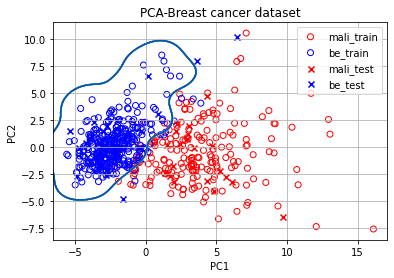

In [41]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
# 악성과 양성 SVM decision boundary 그리기
plot_decision_boundary(pc, clf, ax)

#Train data 그리기
for cluster in range(2):
    sub_cancer_points = pc[train_y == cluster]
    ax.scatter(sub_cancer_points[:, 0], sub_cancer_points[:, 1],edgecolor=color_dict[cluster] ,c='none', label=target_dict[cluster] )
#Test data 그리기
for cluster in range(2):
    sub_cancer_points = pc_test[test_y == cluster]
    ax.scatter(sub_cancer_points[:, 0], sub_cancer_points[:,1], marker='x', c=color_dict[cluster+2], label=target_dict[cluster+2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA-Breast cancer dataset')
ax.legend()
ax.grid()

# 점수
pca_test_accuracy_dict = Counter(clf.predict(pc_test) == test_y)
orig_test_accuracy_dict = Counter(clf_orig.predict(test_df) == test_y)

print("PCA 분석을 사용한 Test dataset accuracy: {}명/{}명 => {:.3f}".format(pca_test_accuracy_dict[True], sum(pca_test_accuracy_dict.values()), clf.score(pc_test, test_y)))
print("PCA를 적용하지 않은 Test dataset accuracy: {}명/{}명 => {:.3f}".format(orig_test_accuracy_dict[True], sum(orig_test_accuracy_dict.values()), clf_orig.score(test_df, test_y)))

## T-SNE 예제

### Mnist 숫자 손글씨 예제

In [42]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1)
X = mnist.data / 255.0
y = mnist.target
print('X shape',X.shape)
print('Y shape',y.shape)

X shape (70000, 784)
Y shape (70000,)


In [43]:
n_image = X.shape[0]
n_image_pixel = X.shape[1]

pixel_columns = [f'pixel{i}' for i in range(1, n_image_pixel + 1)] # column 이름 담은 목록

In [45]:
import pandas as pd
df = pd.DataFrame(X, columns=pixel_columns)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None

### 데이터  샘플링 1만개

In [46]:
import numpy as np
# 랜덤 시드
np.random.seed(30)

# 이미지 데이터 순서를 랜덤으로 바꾼 permutation 배열 저장
rndperm = np.random.permutation(n_image)

# 랜덤  섞은 이미지 중 1만개를 뽑고 df_subset에 담기
n_image_sample = 10000
random_idx = rndperm[:n_image_sample]
df_subset = df.loc[rndperm[:n_image_sample],:].copy()
df_subset.shape

(10000, 786)

<Figure size 432x288 with 0 Axes>

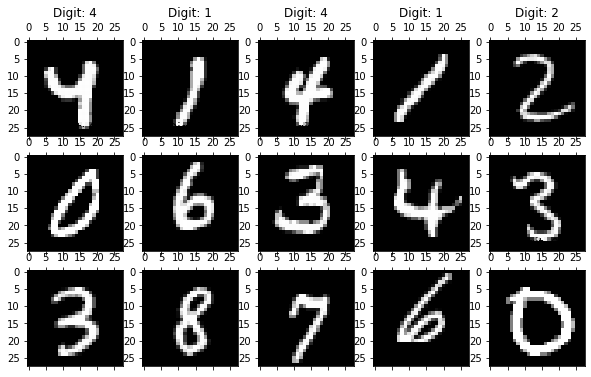

In [47]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.gray()
fig = plt.figure(figsize=(10,6))
n_img_sample = 15
width,height = 28,28

for i in range(0, n_img_sample):
    row = df_subset.iloc[i]
    ax = fig.add_subplot(3,5,i+1, title=f"Digit: {row['label']}")
    ax.matshow(row[pixel_columns]
              .values.reshape((width,height))
              .astype(float))
plt.show()

### PCA를 통한 차원축소

In [48]:
from sklearn.decomposition import PCA

n_dimension = 2
pca = PCA(n_components=n_dimension)

pca_result = pca.fit_transform(df_subset[pixel_columns].values)
df_subset['pca-one'] = pca_result[:,0] # 축소한 결과의 첫번째 차원 값
df_subset['pca-two'] = pca_result[:,1] # 축소한 결과의 두번째 차원 값

print("pca_result shape{}".format(pca_result.shape))

pca_result shape(10000, 2)


In [49]:
print(f"pca-1: {round(pca.explained_variance_ratio_[0],3)*100}%")
print(f"pca-2: {round(pca.explained_variance_ratio_[1],3)*100}%")

pca-1: 9.6%
pca-2: 7.3%


784차원을 2차원으로 차원축소 했을때 정보량이 전체의 16.9%가 남았습니다

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

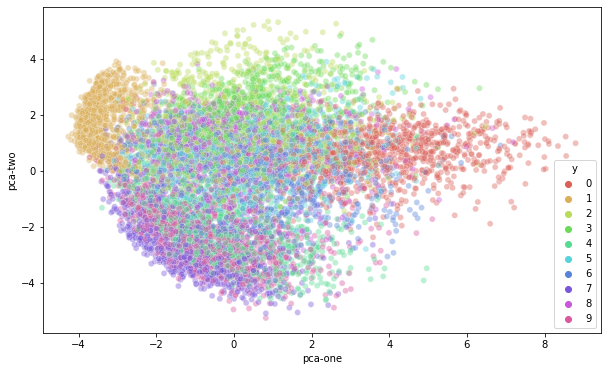

In [50]:
plt.figure(figsize=(10,6))
sns.scatterplot(
        x="pca-one",y="pca-two",
        hue="y",
palette=sns.color_palette("hls",10),
data=df_subset,
legend='full',
alpha=0.4)

같거나 모양이 비슷한 숫자 이미지는 유사한 벡터값을 가지고 있음!

## T-SNE를 이용한 차원축소

[scikit-learn 공식 문서: TSNE 모듈](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE)

In [51]:
from sklearn.manifold import TSNE

data_subset = df_subset[pixel_columns].values
n_dimension = 2
tsne = TSNE(n_components=n_dimension)
tsne_results = tsne.fit_transform(data_subset)

print('done')

/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


done


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

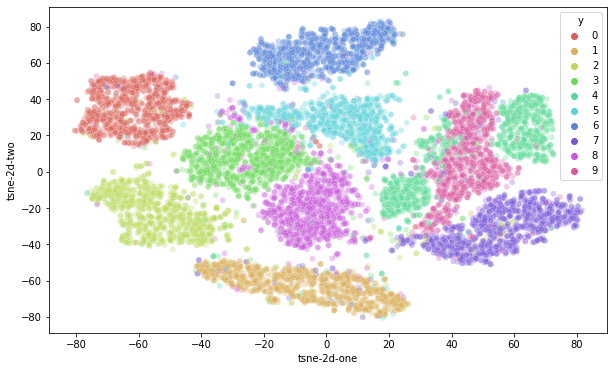

In [53]:
#tsne 결과를 차원별로 추가
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(
x='tsne-2d-one', y='tsne-2d-two',
hue="y",
palette=sns.color_palette('hls',10),
                   data=df_subset,
                   legend='full',
                   alpha=0.3)

T-SNE에서는 고차원에서 먼 거리의 두 점은 저차원에서도 먼 거리에 있어야 합니다. 그러므로 결과적으로 T-SNE를 시각화하면 숫자들 사이의 경계가 뚜렷이 나타나는 장점이 있습니다. 위에서 T-SNE를 훈련시켰을 때 label 정보를 전혀 참조하지 않고 df_subset[pixel_columns] 정보만 참고하여 얻은 결과라는 점에 주목해 주세요. 그래서 T-SNE는 분류기의 Feature Extractor 모델이 카테고리 간 분류 경계선을 뚜렷하게 유지하고 있는지를 확인하는 용도로 자주 쓰입니다.

TSNE는 차원 축소는 아님!
PCA는 정보손실을 최소화 하려고 주성분이라는 물리적 의미를 유지하고 공분산을 통해 원본 데이터를 일정 부분 복원할 수 있는 가능성을 가짐

T-SNE는 정보 손실량에 주목하지 않아 저차원 축이 아무런 물리적 의미를 가지지 않음  
오직 시각화에만 유리